## 实验报告--各种回归算法的房价预测对比

### 导入库及数据

In [15]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor as CLF
from sklearn.ensemble import RandomForestRegressor as RFC
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold as VT

data = pd.read_csv(r"/Users/zhboat/Desktop/Machine Learning/house_data.csv")

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

分析数据，可以看到数据集一共21613个样本，20个特征，‘date’为object类型，无法直接带入模型处理
需要对其进行特征编码

### 对Date进行特征编码

In [3]:
# 删除数据类型为object的特征date
data.drop(['date'],axis = 1, inplace = True)
pd.DataFrame(data)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## 归一化

In [4]:
# 实例化
scaler = MinMaxScaler()
# 生成min(x)和max(x)
scaler = scaler.fit(data)
# 导出结果
result = scaler.transform(data)
result 

array([[0.72010308, 0.01926557, 0.09090909, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.64785332, 0.06072131, 0.09090909, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.56879485, 0.01377049, 0.06060606, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.15378321, 0.04289849, 0.06060606, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.0293272 , 0.04262295, 0.09090909, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.15378321, 0.03278689, 0.06060606, ..., 0.18272425, 0.10686629,
        0.00081098]])

## 划分训练集和测试集

In [5]:
x = data.iloc[:,data.columns != "price"]
y = data.iloc[:,data.columns == "price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1468,3034200058,4,1.50,1390,7200,1.0,0,0,3,7,1140,250,1965,0,98133,47.7224,-122.332,1630,7702
15590,5361700020,3,1.50,1450,7316,1.0,0,0,3,7,1450,0,1961,0,98133,47.7725,-122.349,1440,7316
18552,2568200740,5,2.75,2860,5379,2.0,0,0,3,9,2860,0,2005,0,98052,47.7082,-122.104,2980,6018
10535,3650100105,2,1.00,1050,4125,1.0,0,0,4,7,1050,0,1909,0,98144,47.5736,-122.307,1650,4125
1069,524069037,2,1.00,1240,57000,1.0,0,0,3,7,1240,0,1962,0,98075,47.5970,-122.059,3050,25545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,2322069010,5,5.00,3960,94089,2.0,0,0,3,10,3960,0,1998,0,98038,47.3800,-122.011,2240,64468
19648,2114700368,2,2.50,1400,1262,2.0,0,0,3,8,1160,240,2008,0,98106,47.5342,-122.349,1060,1524
9845,5469501200,3,2.25,2360,14950,1.0,0,0,4,9,2360,0,1978,0,98042,47.3856,-122.158,2720,14388
10799,3751602797,4,2.00,2370,76665,2.0,0,0,4,8,2370,0,1978,0,98001,47.2831,-122.279,2110,19334


## 方差过滤

In [11]:
seletor = VT() # 默认为0
X_var0 = seletor.fit_transform(x)
X_var0.shape

(21613, 19)

In [28]:
xv_train, xv_test, yv_train, yv_test = train_test_split(X_var0,y,test_size=0.3)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15129 non-null  int64  
 1   bedrooms       15129 non-null  int64  
 2   bathrooms      15129 non-null  float64
 3   sqft_living    15129 non-null  int64  
 4   sqft_lot       15129 non-null  int64  
 5   floors         15129 non-null  float64
 6   waterfront     15129 non-null  int64  
 7   view           15129 non-null  int64  
 8   condition      15129 non-null  int64  
 9   grade          15129 non-null  int64  
 10  sqft_above     15129 non-null  int64  
 11  sqft_basement  15129 non-null  int64  
 12  yr_built       15129 non-null  int64  
 13  yr_renovated   15129 non-null  int64  
 14  zipcode        15129 non-null  int64  
 15  lat            15129 non-null  float64
 16  long           15129 non-null  float64
 17  sqft_living15  15129 non-null  int64  
 18  sqft_l

In [22]:
# 排序
for i in [x_train, x_test, y_train, y_test]:
    i.index = range(i.shape[0])
    

xv_train

array([[ 6.11340005e+09,  4.00000000e+00,  2.50000000e+00, ...,
        -1.22343000e+02,  2.41000000e+03,  1.52560000e+04],
       [ 7.34940010e+09,  3.00000000e+00,  1.75000000e+00, ...,
        -1.22205000e+02,  1.60000000e+03,  7.69800000e+03],
       [ 8.09141053e+09,  3.00000000e+00,  2.50000000e+00, ...,
        -1.22169000e+02,  1.72000000e+03,  7.20000000e+03],
       ...,
       [ 7.92325009e+09,  3.00000000e+00,  3.00000000e+00, ...,
        -1.22202000e+02,  3.15000000e+03,  1.14470000e+04],
       [ 7.84350009e+09,  4.00000000e+00,  2.50000000e+00, ...,
        -1.22057000e+02,  1.91000000e+03,  1.21330000e+04],
       [ 7.24069023e+08,  1.00000000e+00,  1.25000000e+00, ...,
        -1.22081000e+02,  2.28000000e+03,  5.07000000e+03]])

In [23]:
for j in [xv_train, xv_test, yv_train, yv_test]:
    j = range(j.shape[0])

## 建立初始模型(方差过滤前)

In [24]:
# 忽略警告
import warnings
warnings.filterwarnings("ignore")

# 决策树
clf = CLF()
clf = clf.fit(x_train, y_train)
score_c0 = clf.score(x_train, y_train)

# 随机森林
rfc = RFC()
rfc = rfc.fit(x_train, y_train)
score_r0 = rfc.score(x_train, y_train)

# KNN
knn = KNN()
knn = knn.fit(x_train, y_train)
score_k0 = knn.score(x_train, y_train)


print("DecisionTree:{}\n".format(score_c0),
      "RandomForest:{}\n".format(score_r0),
      "KNN:{}\n".format(score_k0))

DecisionTree:0.9992727502252935
 RandomForest:0.9807710066845969
 KNN:0.5841319936721696



## 建立初始模型(方差过滤后)

In [25]:
# 决策树
clf = CLF()
clf = clf.fit(xv_train, yv_train)
score_c0 = clf.score(xv_train, yv_train)

# 随机森林
rfc = RFC()
rfc = rfc.fit(xv_train, yv_train)
score_r0 = rfc.score(xv_train, yv_train)

# KNN
knn = KNN()
knn = knn.fit(xv_train, yv_train)
score_k0 = knn.score(xv_train, yv_train)


print("DecisionTree:{}\n".format(score_c0),
      "RandomForest:{}\n".format(score_r0),
      "KNN:{}\n".format(score_k0))

DecisionTree:0.9993585763767501
 RandomForest:0.9828295075041777
 KNN:0.559584588298949



### 决策树调参

0.7853952319594668 10


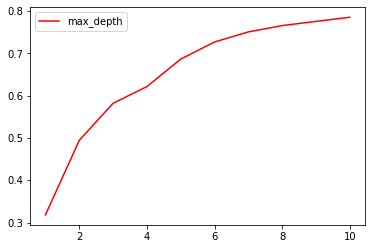

In [26]:
score_c = []
for i in range(10):
    clf = CLF(random_state = 20,
                                 max_depth = i + 1,)
    clf = clf.fit(x_train, y_train)
    score = cross_val_score(clf, x, y, cv = 10).mean()
    score_c.append(score)
    

print(max(score_c), score_c.index(max(score_c)) + 1)
plt.plot(range(1, 11), score_c,color = "red", label = "max_depth")

# 画出学习曲线
plt.legend()
plt.show()

### 随机森林调参

0.8685592007948983 19


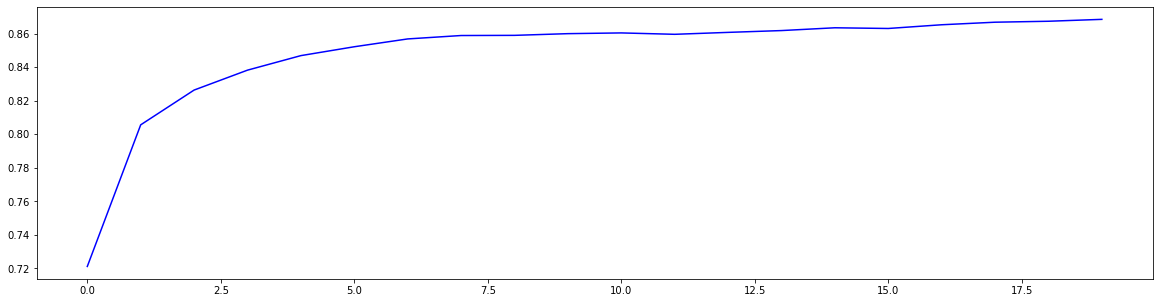

In [12]:
score_r = []
for i in range(20):
    rfc = RFC(random_state = 90,
              n_estimators = i + 1)
    rfc = rfc.fit(x_train, y_train)
    score = cross_val_score(rfc, x, y, cv = 10).mean()
    score_r.append(score)

print(max(score_r), score_r.index(max(score_r)))


plt.figure(figsize = [20,5])
plt.plot(range(20), score_r, color = "blue")

# 画出学习曲线
plt.show()

0.38827106621958346 1


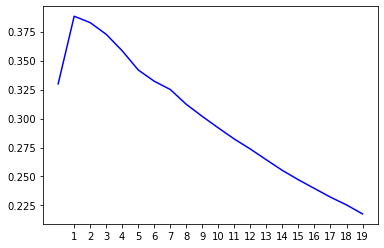

In [13]:
score_k = []
for i in range(20):
    knn = KNN(i + 1)
    knn = knn.fit(x_train, y_train)
    score = cross_val_score(knn, x, y ,cv = 10).mean()
    
    score_k.append(score)

print(max(score_k), score_k.index(max(score_k)))

plt.xticks(range(1,21))
plt.plot(range(20), score_k, color="blue")

# 画出学习曲线
plt.show()

## R方对比

In [15]:
clf_s = cross_val_score(clf, x, y, cv = 20).mean()
rfc_s = cross_val_score(rfc, x, y, cv = 20).mean()
knn_s = cross_val_score(KNN(), X_var0, y, cv = 20).mean()
print("DecisionTree:{}\n".format(clf_s.mean()),
      "RandomForest:{}\n".format(rfc_s.mean()),
      "KNN:{}\n".format(knn_s.mean()))

DecisionTree:0.7723628610222069
 RandomForest:0.8729266297037167
 KNN:0.38214034041727246


## 均方误差对比

In [17]:
clf_s = cross_val_score(clf, x, y, cv = 20, scoring = "neg_mean_squared_error")
rfc_s = cross_val_score(rfc, x, y, cv = 20, scoring = "neg_mean_squared_error")
knn_s = cross_val_score(KNN(), X_var0, y, cv = 20, scoring = "neg_mean_squared_error")
print("DecisionTree:{}\n".format(clf_s.mean()), 
      "RandomForest:{}\n".format(rfc_s.mean()),
      "KNN:{}\n".format(knn_s.mean()))

DecisionTree:-30493276247.023182
 RandomForest:-17035145193.446844
 KNN:-83195182963.64513



## 三个模型时间对比

In [36]:
%%timeit
clf_s

21.6 ns ± 0.832 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [41]:
%%timeit
rfc_s

21.5 ns ± 0.404 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [26]:
%%timeit
knn_s

19.9 ns ± 0.427 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
